# <font color='brown'>Face Mask Detection Model - EfficientnetB5</font>

### Importing the Necessary Packages

In [1]:
from imutils import paths #To import path of the images in dataset
import matplotlib.pyplot as plt # To use plots for visualisation
import numpy as np # Array handling library
import os # For file handling

from tensorflow.keras.preprocessing.image import ImageDataGenerator # For Data Augmentation
from tensorflow.keras.applications.efficientnet import EfficientNetB5 # Deep Neural network model trained on Imagenet Dataset of Google

from tensorflow.keras.layers import AveragePooling2D # To Construct Pooling Layer
from tensorflow.keras.layers import Dropout # To Dropout the inputs for tackling overfitting 
from tensorflow.keras.layers import Flatten # Flatten the multidimension to single dimension
from tensorflow.keras.layers import Dense # Output layer - Fully connected
from tensorflow.keras.layers import Input # To create an Input layer without using Input Layer
from tensorflow.keras.models import Model # To group layers into an object 

from tensorflow.keras.optimizers import Adam # Optimizer for Training the Model

# Image Pre-Processing for Training the model
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

# One-Hot encoding of the labels
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split # To Split the Dataset into Train & Test
from sklearn.metrics import classification_report # To Print a Classification Report
from sklearn.metrics import confusion_matrix # To Print a Confusion matrix
import seaborn as sns # To plot a Confusion Matrix

### Creating an Object for Images and Label

In [2]:
image_paths = list(paths.list_images('/Users/vinith/Desktop/Dissertation/dataset')) # Getting the image paths
data = [] # list object to store images
labels = [] # list object to store labels  

### Looping over the image dataset to append them on respective lists

In [3]:
for image_path in image_paths: # looping over the image_paths 
    lab = image_path.split(os.path.sep)[-2] # extracting the class label from the filename
    
    # load the input_image with target resolution (224x224) and preprocess it
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)

    # update the data and labels lists, respectively
    data.append(img)
    labels.append(lab)

/Users/vinith/tensorflow-test/env/lib/python3.8/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


### Convert the data and labels to NumPy arrays

In [4]:
data = np.array(data, dtype="float32") # converting imagedata into array  
labels = np.array(labels) # converting label data into array 

In [5]:
data.shape

(4092, 224, 224, 3)

In [6]:
labels.shape

(4092,)

### One-Hot Encoding of Categorical Variable

In [7]:
# One-Hot encoding using LabelBinarizer() technique
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

### Train & Test Split

In [8]:
# Splitting the training and testing data in the ratio of 80/20.
(X_train, X_test, y_train, y_test) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=45)

In [9]:
X_train.shape

(3273, 224, 224, 3)

In [10]:
X_test.shape

(819, 224, 224, 3)

### Data Augmentation

In [11]:
# constructing the training image_generator for image transformation
augment = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,
                         shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

### Loading a Pre_trained Model MobilenetV2

In [12]:
# loading the MobileNetV2 pretrained model with weights of imagent dataset
# Also remove the last fully connected layer
bm = EfficientNetB5(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
bm.summary()

Metal device set to: Apple M1


2022-12-16 12:26:32.337831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-16 12:26:32.338738: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "efficientnetb5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

                                                                                                  
 block1c_bn (BatchNormalization  (None, 112, 112, 24  96         ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 112, 112, 24  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 24)          0           ['block1c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block1c_s

 block2b_activation (Activation  (None, 56, 56, 240)  0          ['block2b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block2b_se_squeeze (GlobalAver  (None, 240)         0           ['block2b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2b_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block2b_se_squeeze[0][0]']     
                                                                                                  
 block2b_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block2b_se_reshape[0][0]']     
                                                                                                  
 block2b_s

                                                                                                  
 block2d_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block2d_se_squeeze[0][0]']     
                                                                                                  
 block2d_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block2d_se_reshape[0][0]']     
                                                                                                  
 block2d_se_expand (Conv2D)     (None, 1, 1, 240)    2640        ['block2d_se_reduce[0][0]']      
                                                                                                  
 block2d_se_excite (Multiply)   (None, 56, 56, 240)  0           ['block2d_activation[0][0]',     
                                                                  'block2d_se_expand[0][0]']      
                                                                                                  
 block2d_p

                                                                                                  
 block3a_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block3a_se_reshape[0][0]']     
                                                                                                  
 block3a_se_expand (Conv2D)     (None, 1, 1, 240)    2640        ['block3a_se_reduce[0][0]']      
                                                                                                  
 block3a_se_excite (Multiply)   (None, 28, 28, 240)  0           ['block3a_activation[0][0]',     
                                                                  'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, 28, 28, 64)   15360       ['block3a_se_excite[0][0]']      
                                                                                                  
 block3a_p

 block3c_project_bn (BatchNorma  (None, 28, 28, 64)  256         ['block3c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3c_drop (Dropout)         (None, 28, 28, 64)   0           ['block3c_project_bn[0][0]']     
                                                                                                  
 block3c_add (Add)              (None, 28, 28, 64)   0           ['block3c_drop[0][0]',           
                                                                  'block3b_add[0][0]']            
                                                                                                  
 block3d_expand_conv (Conv2D)   (None, 28, 28, 384)  24576       ['block3c_add[0][0]']            
                                                                                                  
 block3d_e

 block3e_add (Add)              (None, 28, 28, 64)   0           ['block3e_drop[0][0]',           
                                                                  'block3d_add[0][0]']            
                                                                                                  
 block4a_expand_conv (Conv2D)   (None, 28, 28, 384)  24576       ['block3e_add[0][0]']            
                                                                                                  
 block4a_expand_bn (BatchNormal  (None, 28, 28, 384)  1536       ['block4a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4a_expand_activation (Act  (None, 28, 28, 384)  0          ['block4a_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block4c_expand_activation (Act  (None, 14, 14, 768)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4c_dwconv (DepthwiseConv2  (None, 14, 14, 768)  6912       ['block4c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4c_bn (BatchNormalization  (None, 14, 14, 768)  3072       ['block4c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4c_a

 D)                                                              ']                               
                                                                                                  
 block4e_bn (BatchNormalization  (None, 14, 14, 768)  3072       ['block4e_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4e_activation (Activation  (None, 14, 14, 768)  0          ['block4e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4e_se_squeeze (GlobalAver  (None, 768)         0           ['block4e_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block4g_activation (Activation  (None, 14, 14, 768)  0          ['block4g_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4g_se_squeeze (GlobalAver  (None, 768)         0           ['block4g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4g_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4g_se_squeeze[0][0]']     
                                                                                                  
 block4g_se_reduce (Conv2D)     (None, 1, 1, 32)     24608       ['block4g_se_reshape[0][0]']     
                                                                                                  
 block4g_s

                                                                                                  
 block5b_se_expand (Conv2D)     (None, 1, 1, 1056)   47520       ['block5b_se_reduce[0][0]']      
                                                                                                  
 block5b_se_excite (Multiply)   (None, 14, 14, 1056  0           ['block5b_activation[0][0]',     
                                )                                 'block5b_se_expand[0][0]']      
                                                                                                  
 block5b_project_conv (Conv2D)  (None, 14, 14, 176)  185856      ['block5b_se_excite[0][0]']      
                                                                                                  
 block5b_project_bn (BatchNorma  (None, 14, 14, 176)  704        ['block5b_project_conv[0][0]']   
 lization)                                                                                        
          

 block5d_se_excite (Multiply)   (None, 14, 14, 1056  0           ['block5d_activation[0][0]',     
                                )                                 'block5d_se_expand[0][0]']      
                                                                                                  
 block5d_project_conv (Conv2D)  (None, 14, 14, 176)  185856      ['block5d_se_excite[0][0]']      
                                                                                                  
 block5d_project_bn (BatchNorma  (None, 14, 14, 176)  704        ['block5d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5d_drop (Dropout)         (None, 14, 14, 176)  0           ['block5d_project_bn[0][0]']     
                                                                                                  
 block5d_a

 block5f_project_conv (Conv2D)  (None, 14, 14, 176)  185856      ['block5f_se_excite[0][0]']      
                                                                                                  
 block5f_project_bn (BatchNorma  (None, 14, 14, 176)  704        ['block5f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5f_drop (Dropout)         (None, 14, 14, 176)  0           ['block5f_project_bn[0][0]']     
                                                                                                  
 block5f_add (Add)              (None, 14, 14, 176)  0           ['block5f_drop[0][0]',           
                                                                  'block5e_add[0][0]']            
                                                                                                  
 block5g_e

 block6a_project_conv (Conv2D)  (None, 7, 7, 304)    321024      ['block6a_se_excite[0][0]']      
                                                                                                  
 block6a_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6a_project_bn[0][0]']     
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6b_e

 block6d_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6c_add[0][0]']            
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6d_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6d_dwconv (DepthwiseConv2  (None, 7, 7, 1824)  45600       ['block6d_expand_activation[0][0]
 D)                                                              ']                               
          

 block6f_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6f_dwconv (DepthwiseConv2  (None, 7, 7, 1824)  45600       ['block6f_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6f_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6f_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6f_activation (Activation  (None, 7, 7, 1824)  0           ['block6f_bn[0][0]']             
 )        

                                                                                                  
 block6h_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6h_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6h_activation (Activation  (None, 7, 7, 1824)  0           ['block6h_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6h_se_squeeze (GlobalAver  (None, 1824)        0           ['block6h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6h_s

 )                                                                                                
                                                                                                  
 block7a_se_squeeze (GlobalAver  (None, 1824)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block7a_se_reduce[0][0]']      
          

                                                                                                  
 block7c_se_excite (Multiply)   (None, 7, 7, 3072)   0           ['block7c_activation[0][0]',     
                                                                  'block7c_se_expand[0][0]']      
                                                                                                  
 block7c_project_conv (Conv2D)  (None, 7, 7, 512)    1572864     ['block7c_se_excite[0][0]']      
                                                                                                  
 block7c_project_bn (BatchNorma  (None, 7, 7, 512)   2048        ['block7c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7c_drop (Dropout)         (None, 7, 7, 512)    0           ['block7c_project_bn[0][0]']     
          

In [13]:
# constructing the Output fully connected layer with output of 2 category
hm = bm.output
hm = AveragePooling2D(pool_size=(7, 7))(hm) # a layer with average pooling size of (7,7)
hm = Flatten(name="flatten")(hm) # Flatten the layer into single dimension
hm = Dense(128, activation="relu")(hm) # Output layer of 128
hm = Dropout(0.5)(hm) # Dropout 50% of the neurons
hm = Dense(2, activation="softmax")(hm) # Fianl Output Layer with 2 Categories

In [14]:
# Now place the created layers of output on the base model 
# to construct a model that produces output with 2 categories
main_model = Model(inputs=bm.input, outputs=hm)
main_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

                                                                                                  
 block1c_bn (BatchNormalization  (None, 112, 112, 24  96         ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 112, 112, 24  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 24)          0           ['block1c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block1c_s

 block2b_activation (Activation  (None, 56, 56, 240)  0          ['block2b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block2b_se_squeeze (GlobalAver  (None, 240)         0           ['block2b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2b_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block2b_se_squeeze[0][0]']     
                                                                                                  
 block2b_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block2b_se_reshape[0][0]']     
                                                                                                  
 block2b_s

                                                                                                  
 block2d_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block2d_se_squeeze[0][0]']     
                                                                                                  
 block2d_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block2d_se_reshape[0][0]']     
                                                                                                  
 block2d_se_expand (Conv2D)     (None, 1, 1, 240)    2640        ['block2d_se_reduce[0][0]']      
                                                                                                  
 block2d_se_excite (Multiply)   (None, 56, 56, 240)  0           ['block2d_activation[0][0]',     
                                                                  'block2d_se_expand[0][0]']      
                                                                                                  
 block2d_p

                                                                                                  
 block3a_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block3a_se_reshape[0][0]']     
                                                                                                  
 block3a_se_expand (Conv2D)     (None, 1, 1, 240)    2640        ['block3a_se_reduce[0][0]']      
                                                                                                  
 block3a_se_excite (Multiply)   (None, 28, 28, 240)  0           ['block3a_activation[0][0]',     
                                                                  'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, 28, 28, 64)   15360       ['block3a_se_excite[0][0]']      
                                                                                                  
 block3a_p

 block3c_project_bn (BatchNorma  (None, 28, 28, 64)  256         ['block3c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3c_drop (Dropout)         (None, 28, 28, 64)   0           ['block3c_project_bn[0][0]']     
                                                                                                  
 block3c_add (Add)              (None, 28, 28, 64)   0           ['block3c_drop[0][0]',           
                                                                  'block3b_add[0][0]']            
                                                                                                  
 block3d_expand_conv (Conv2D)   (None, 28, 28, 384)  24576       ['block3c_add[0][0]']            
                                                                                                  
 block3d_e

 block3e_add (Add)              (None, 28, 28, 64)   0           ['block3e_drop[0][0]',           
                                                                  'block3d_add[0][0]']            
                                                                                                  
 block4a_expand_conv (Conv2D)   (None, 28, 28, 384)  24576       ['block3e_add[0][0]']            
                                                                                                  
 block4a_expand_bn (BatchNormal  (None, 28, 28, 384)  1536       ['block4a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4a_expand_activation (Act  (None, 28, 28, 384)  0          ['block4a_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block4c_expand_activation (Act  (None, 14, 14, 768)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4c_dwconv (DepthwiseConv2  (None, 14, 14, 768)  6912       ['block4c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4c_bn (BatchNormalization  (None, 14, 14, 768)  3072       ['block4c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4c_a

 D)                                                              ']                               
                                                                                                  
 block4e_bn (BatchNormalization  (None, 14, 14, 768)  3072       ['block4e_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4e_activation (Activation  (None, 14, 14, 768)  0          ['block4e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4e_se_squeeze (GlobalAver  (None, 768)         0           ['block4e_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block4g_activation (Activation  (None, 14, 14, 768)  0          ['block4g_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4g_se_squeeze (GlobalAver  (None, 768)         0           ['block4g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4g_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4g_se_squeeze[0][0]']     
                                                                                                  
 block4g_se_reduce (Conv2D)     (None, 1, 1, 32)     24608       ['block4g_se_reshape[0][0]']     
                                                                                                  
 block4g_s

                                                                                                  
 block5b_se_expand (Conv2D)     (None, 1, 1, 1056)   47520       ['block5b_se_reduce[0][0]']      
                                                                                                  
 block5b_se_excite (Multiply)   (None, 14, 14, 1056  0           ['block5b_activation[0][0]',     
                                )                                 'block5b_se_expand[0][0]']      
                                                                                                  
 block5b_project_conv (Conv2D)  (None, 14, 14, 176)  185856      ['block5b_se_excite[0][0]']      
                                                                                                  
 block5b_project_bn (BatchNorma  (None, 14, 14, 176)  704        ['block5b_project_conv[0][0]']   
 lization)                                                                                        
          

 block5d_se_excite (Multiply)   (None, 14, 14, 1056  0           ['block5d_activation[0][0]',     
                                )                                 'block5d_se_expand[0][0]']      
                                                                                                  
 block5d_project_conv (Conv2D)  (None, 14, 14, 176)  185856      ['block5d_se_excite[0][0]']      
                                                                                                  
 block5d_project_bn (BatchNorma  (None, 14, 14, 176)  704        ['block5d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5d_drop (Dropout)         (None, 14, 14, 176)  0           ['block5d_project_bn[0][0]']     
                                                                                                  
 block5d_a

 block5f_project_conv (Conv2D)  (None, 14, 14, 176)  185856      ['block5f_se_excite[0][0]']      
                                                                                                  
 block5f_project_bn (BatchNorma  (None, 14, 14, 176)  704        ['block5f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5f_drop (Dropout)         (None, 14, 14, 176)  0           ['block5f_project_bn[0][0]']     
                                                                                                  
 block5f_add (Add)              (None, 14, 14, 176)  0           ['block5f_drop[0][0]',           
                                                                  'block5e_add[0][0]']            
                                                                                                  
 block5g_e

 block6a_project_conv (Conv2D)  (None, 7, 7, 304)    321024      ['block6a_se_excite[0][0]']      
                                                                                                  
 block6a_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6a_project_bn[0][0]']     
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6b_e

 block6d_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6c_add[0][0]']            
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6d_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6d_dwconv (DepthwiseConv2  (None, 7, 7, 1824)  45600       ['block6d_expand_activation[0][0]
 D)                                                              ']                               
          

 block6f_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6f_dwconv (DepthwiseConv2  (None, 7, 7, 1824)  45600       ['block6f_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6f_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6f_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6f_activation (Activation  (None, 7, 7, 1824)  0           ['block6f_bn[0][0]']             
 )        

                                                                                                  
 block6h_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6h_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6h_activation (Activation  (None, 7, 7, 1824)  0           ['block6h_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6h_se_squeeze (GlobalAver  (None, 1824)        0           ['block6h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6h_s

 )                                                                                                
                                                                                                  
 block7a_se_squeeze (GlobalAver  (None, 1824)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block7a_se_reduce[0][0]']      
          

                                                                                                  
 block7c_se_excite (Multiply)   (None, 7, 7, 3072)   0           ['block7c_activation[0][0]',     
                                                                  'block7c_se_expand[0][0]']      
                                                                                                  
 block7c_project_conv (Conv2D)  (None, 7, 7, 512)    1572864     ['block7c_se_excite[0][0]']      
                                                                                                  
 block7c_project_bn (BatchNorma  (None, 7, 7, 512)   2048        ['block7c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7c_drop (Dropout)         (None, 7, 7, 512)    0           ['block7c_project_bn[0][0]']     
          

In [15]:
# Freezing all the layers in the base model bm
for layer in bm.layers:
    layer.trainable = False

### Initialising the learning rate, Number of Epoch for training & Batch Size

In [16]:
lrate = 1e-4 # 0.0001 while calculating gradients 
epoch = 10 # No. of Epoch
bs = 32

### Model Compilation

In [17]:
opt = Adam(lr=lrate, decay=lrate / epoch)
main_model.compile(loss="binary_crossentropy", optimizer=opt,
metrics=["accuracy"])

/Users/vinith/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Model Training

In [18]:
History = main_model.fit(augment.flow(X_train, y_train, batch_size=bs),
steps_per_epoch=len(X_train) // bs,
validation_data=(X_test, y_test),
validation_steps=len(X_test) // bs,
epochs=epoch)

Epoch 1/10


2022-12-16 12:26:36.827124: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-16 12:26:41.877740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - ETA: 0s - loss: 0.3193 - accuracy: 0.9151

2022-12-16 12:28:15.174170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - 124s 1s/step - loss: 0.3193 - accuracy: 0.9151 - val_loss: 0.0995 - val_accuracy: 0.9817
Epoch 2/10
102/102 [==============================] - 112s 1s/step - loss: 0.0960 - accuracy: 0.9852 - val_loss: 0.0546 - val_accuracy: 0.9915
Epoch 3/10
102/102 [==============================] - 107s 1s/step - loss: 0.0687 - accuracy: 0.9815 - val_loss: 0.0404 - val_accuracy: 0.9915
Epoch 4/10
102/102 [==============================] - 109s 1s/step - loss: 0.0518 - accuracy: 0.9898 - val_loss: 0.0335 - val_accuracy: 0.9915
Epoch 5/10
102/102 [==============================] - 108s 1s/step - loss: 0.0437 - accuracy: 0.9889 - val_loss: 0.0295 - val_accuracy: 0.9927
Epoch 6/10
102/102 [==============================] - 109s 1s/step - loss: 0.0390 - accuracy: 0.9895 - val_loss: 0.0270 - val_accuracy: 0.9927
Epoch 7/10
102/102 [==============================] - 110s 1s/step - loss: 0.0380 - accuracy: 0.9890 - val_loss: 0.0256 - val_accuracy: 0.9927
Epoch 8/10

### Making Prediction

In [19]:
# making predictions over the testing set
pred_idx = main_model.predict(X_test, batch_size=bs) # using the trained model to predict the labels of testing set

2022-12-16 12:45:20.112969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [20]:
pred_idx = np.argmax(pred_idx, axis=1) # using argmax function to predict probability of predicted labels

### Classification Report

In [21]:
# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), pred_idx,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      1.00      0.99       433
without_mask       0.99      0.99      0.99       386

    accuracy                           0.99       819
   macro avg       0.99      0.99      0.99       819
weighted avg       0.99      0.99      0.99       819



### Confusion Matrix

In [22]:
cm = confusion_matrix((y_test.argmax(axis=1)), pred_idx, labels=[0,1])
cm

array([[431,   2],
       [  4, 382]])

<AxesSubplot:>

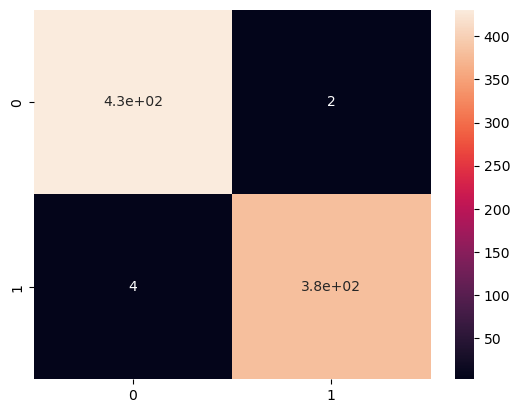

In [23]:
sns.heatmap(cm, annot=True)

### Plotting Accuracy and Loss Curves

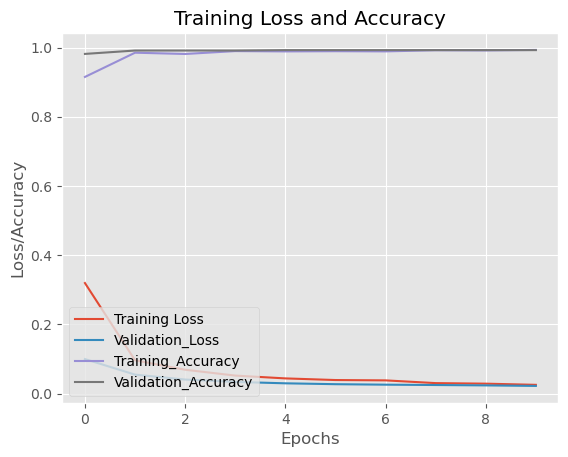

In [24]:
# plot the training loss and accuracy
n = epoch
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n), History.history["loss"], label="Training Loss")
plt.plot(np.arange(0, n), History.history["val_loss"], label="Validation_Loss")
plt.plot(np.arange(0, n), History.history["accuracy"], label="Training_Accuracy")
plt.plot(np.arange(0, n), History.history["val_accuracy"], label="Validation_Accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

### Reference
    FaceMaskDetection - Chandrikadeb7 - Github 